In [1]:
import matplotlib.pyplot as plt
import torch

In [2]:
"""
線形回帰を勾配降下法で解く(スクラッチ実装)
"""

# 乱数を固定
torch.manual_seed(0)

# 真の重み
w_true = torch.tensor([1., 2., 3.])

In [3]:
# データの準備
N = 100
X = torch.cat([torch.ones(N, 1),
               torch.randn((N, 2))
              ], dim=1)
print(X.size())

noise = torch.randn(N) * 0.5
y = torch.mv(X, w_true) + noise

torch.Size([100, 3])


In [4]:
# 重みの初期化
w = torch.randn(w_true.size(0), requires_grad=True)
print(w.size())

torch.Size([3])


In [5]:
# 学習
learning_rate = 0.1

loss_list = []
num_epochs = 5

for epoch in range(1, num_epochs + 1):
    # 前epochでの backward() で計算された勾配を初期化
    # backward()するまで w.grad は None
    w.grad = None
    
    # 予測の計算
    y_pred = torch.mv(X, w)
    
    mse_loss = torch.mean((y - y_pred) ** 2)
    mse_loss.backward()
    
    # .item() は１つの要素「だけ」のtensorの値をとってくる
    # 複数要素に使うと⇒ValueError: only one elements tensors can be converted to Python scalars
    assert isinstance(mse_loss.item(), float)
    loss_list.append(mse_loss.item())
    
    # 勾配の確認
    print(f'Epoch{epoch}: w= {w} dL/dw = {w.grad}')
    
    # 勾配の更新
    w.data = w - learning_rate * w.grad.data

Epoch1: w= tensor([ 0.7308, -0.0440,  1.1634], requires_grad=True) dL/dw = tensor([-0.3752, -3.9382, -4.8141])
Epoch2: w= tensor([0.7683, 0.3499, 1.6448], requires_grad=True) dL/dw = tensor([-0.3406, -3.1497, -3.6396])
Epoch3: w= tensor([0.8023, 0.6648, 2.0088], requires_grad=True) dL/dw = tensor([-0.3037, -2.5266, -2.7458])
Epoch4: w= tensor([0.8327, 0.9175, 2.2834], requires_grad=True) dL/dw = tensor([-0.2670, -2.0330, -2.0664])
Epoch5: w= tensor([0.8594, 1.1208, 2.4900], requires_grad=True) dL/dw = tensor([-0.2322, -1.6411, -1.5507])


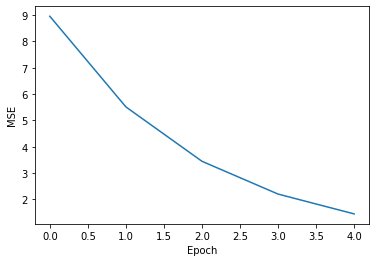

In [6]:
# 損失の可視化
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

終わり